# inne funkcje aktywacji


In [2]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# load datasets

data_dir = Path("data")
multimodal_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")
steps_train = pd.read_csv(data_dir / "regression" / "steps-large-training.csv")
steps_test = pd.read_csv(data_dir / "regression" / "steps-large-test.csv")
rings3_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings5_train = pd.read_csv(data_dir / "classification" / "rings5-regular-training.csv")
rings3_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
rings5_test = pd.read_csv(data_dir / "classification" / "rings5-regular-test.csv")

In [4]:
multimodal_val = multimodal_train.sample(frac=0.2, random_state=42)
multimodal_train = multimodal_train.drop(multimodal_val.index)

steps_val = steps_train.sample(frac=0.2, random_state=42)
steps_train = steps_train.drop(steps_val.index)

rings3_val = rings3_train.sample(frac=0.2, random_state=42)
rings3_train = rings3_train.drop(rings3_val.index)

rings5_val = rings5_train.sample(frac=0.2, random_state=42)
rings5_train = rings5_train.drop(rings5_val.index)

# multimodal

In [10]:
def layers(activation_type, num_layers = 1, neurons = 5, output_type="regression", output_dim=1):
    activation_output = "linear" if output_type == "regression" else "softmax"
    return [
        {"output_dim": neurons, "activation": activation_type, "init": "xavier"}
    ] * num_layers + [
        {"output_dim": output_dim, "output_type": output_type, "activation": activation_output, "init": "normal"}
    ]

norm = networks.assets.Normalizator(multimodal_train)
val = norm(multimodal_val)
train = norm(multimodal_train)
test = norm(multimodal_test)

In [6]:
train[["x"]].to_numpy().T.shape

(1, 8000)

In [7]:
activations = ["linear", "tanh", "relu", "sigmoid"]
num_layers = [1, 2, 3]
num_neurons = [2, 5, 10]
max_epochs = 1000


MSE for 1 layer and linear activation: 3096.2549378107146


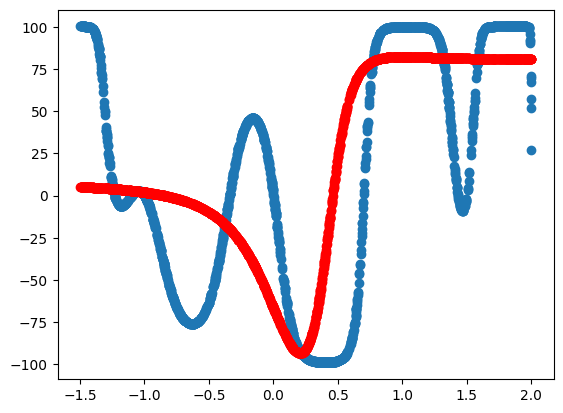

In [9]:


mlp = networks.MLP(layers(activations[1], num_layers[2]), input=train[["x"]].T)
losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=0.01, plot_losses=False, verbose=False)

y_hat = mlp.predict(multimodal_val[["x"]].to_numpy().T)
plt.scatter(multimodal_val["x"], multimodal_val["y"])
plt.scatter(multimodal_val["x"], norm.denorm(y_hat.T, index="y"), color="red")
print("MSE for 1 layer and tanh activation:", np.mean((multimodal_val[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))


In [13]:
mses = []

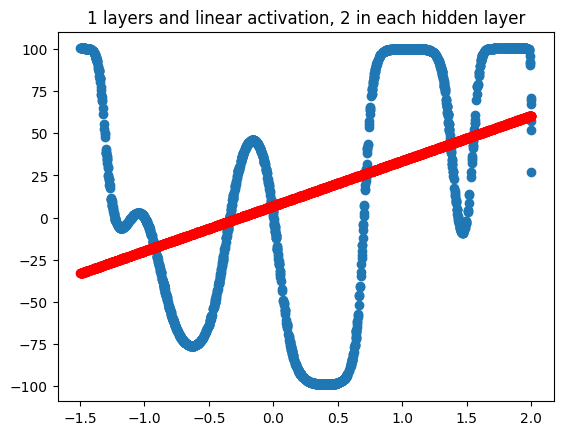

MSE for 1 layers and linear activation: 4367.006041567865


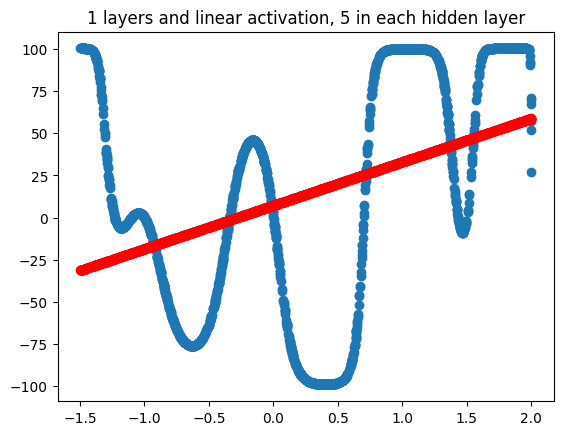

MSE for 1 layers and linear activation: 4371.387217416432


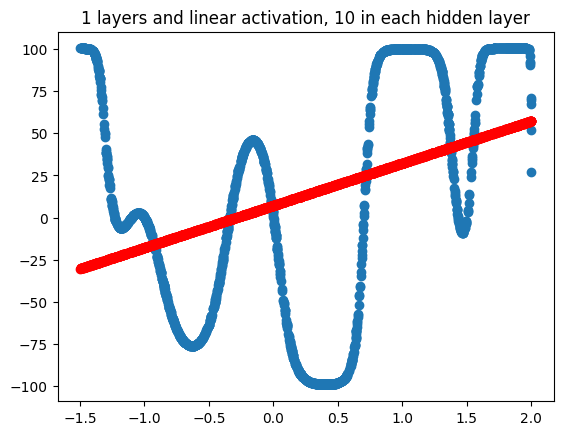

MSE for 1 layers and linear activation: 4376.067617212638


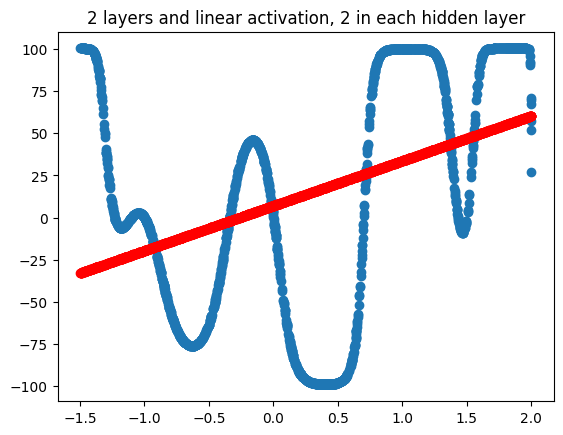

MSE for 2 layers and linear activation: 4367.384937343476


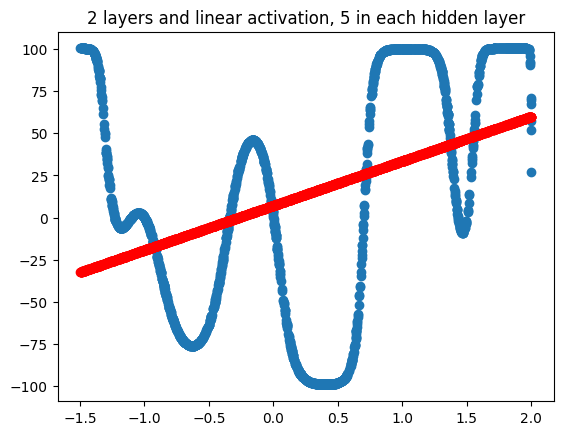

MSE for 2 layers and linear activation: 4368.409833736917


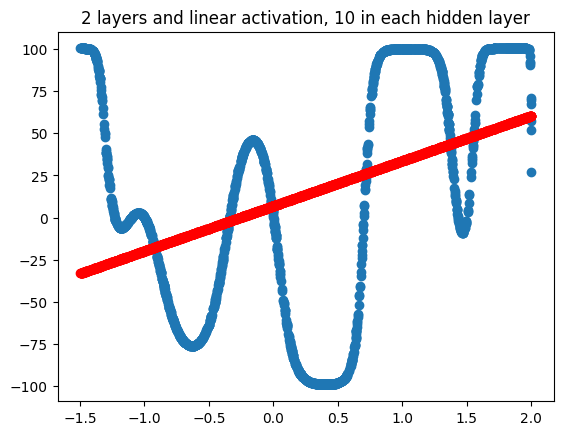

MSE for 2 layers and linear activation: 4367.0742538441955


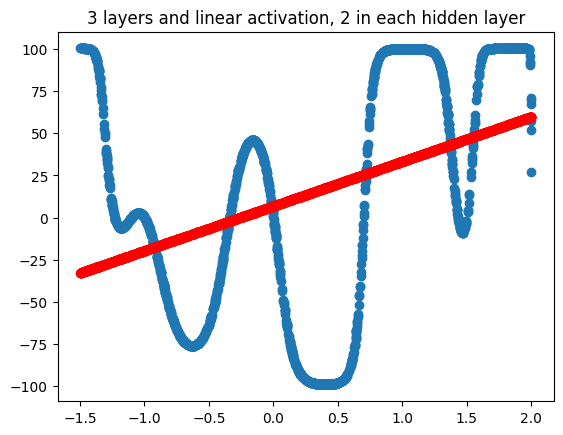

MSE for 3 layers and linear activation: 4367.963578966562


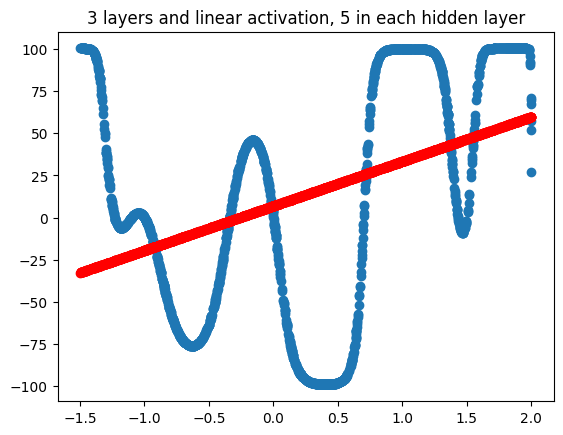

MSE for 3 layers and linear activation: 4368.2393188777005


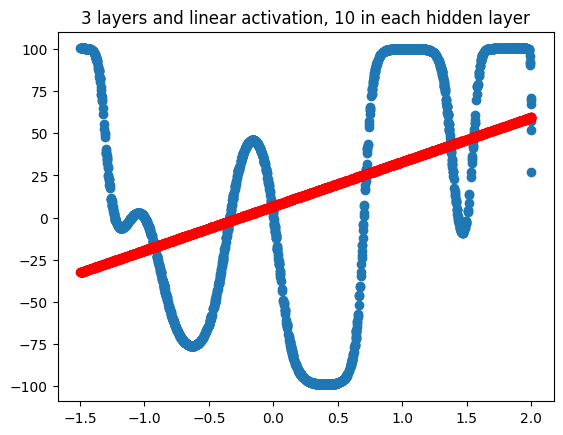

MSE for 3 layers and linear activation: 4368.7439754002135


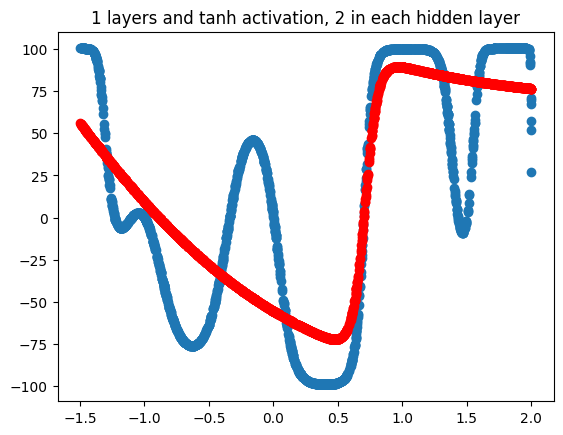

MSE for 1 layers and tanh activation: 1625.311440826614


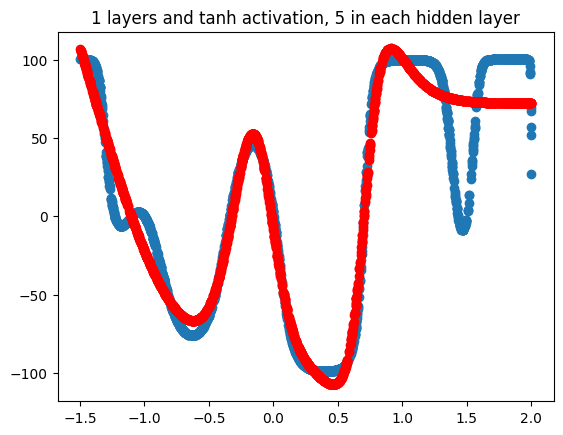

MSE for 1 layers and tanh activation: 371.2707775559294


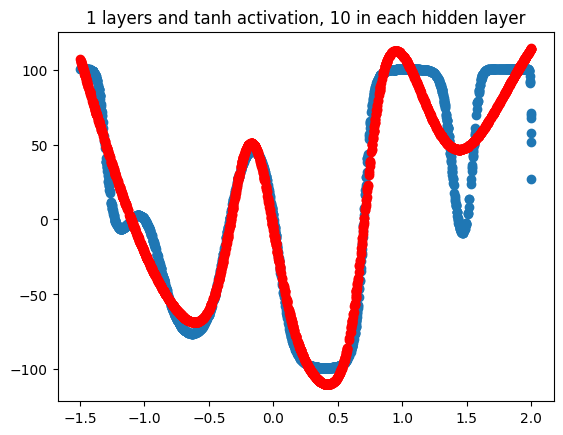

MSE for 1 layers and tanh activation: 288.03040912522505


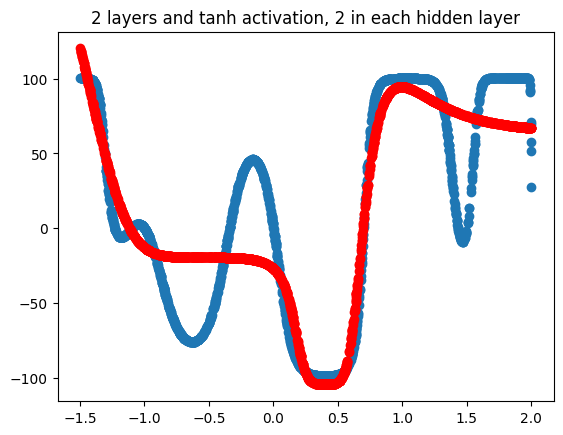

MSE for 2 layers and tanh activation: 966.3847559641239


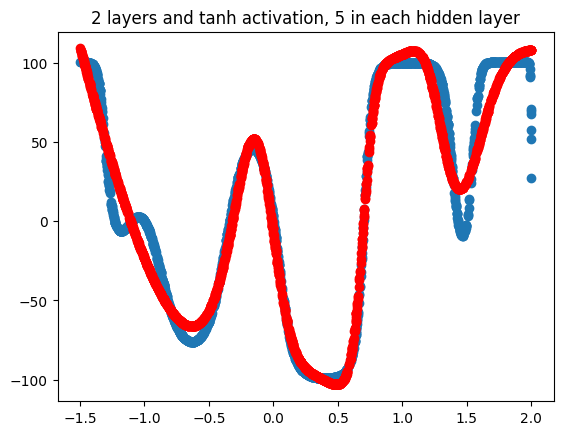

MSE for 2 layers and tanh activation: 188.12552640720352


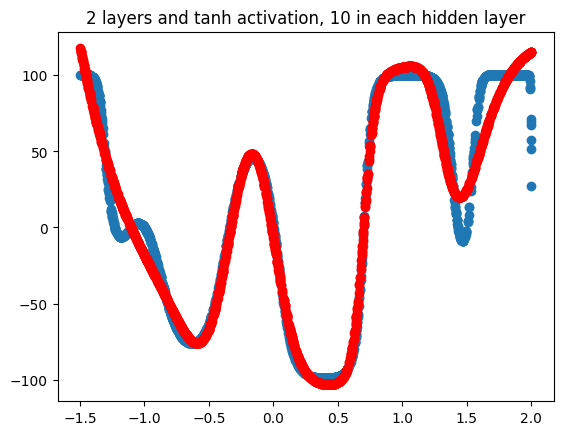

MSE for 2 layers and tanh activation: 170.48135478724956


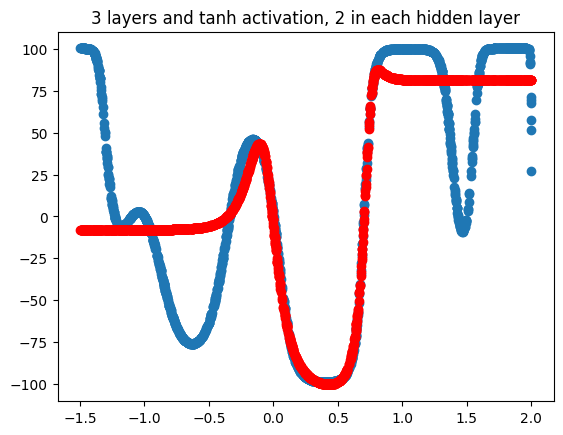

MSE for 3 layers and tanh activation: 1309.2636635885822


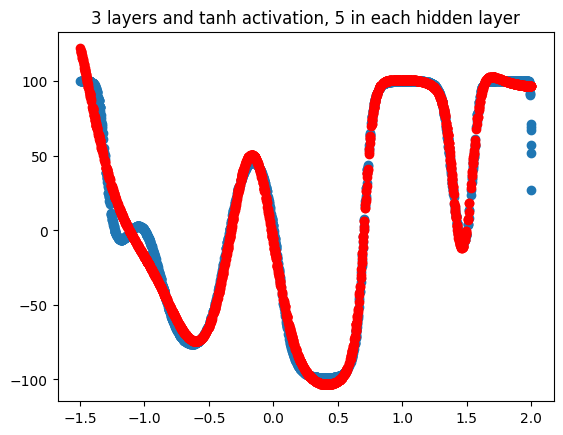

MSE for 3 layers and tanh activation: 59.27459569299062


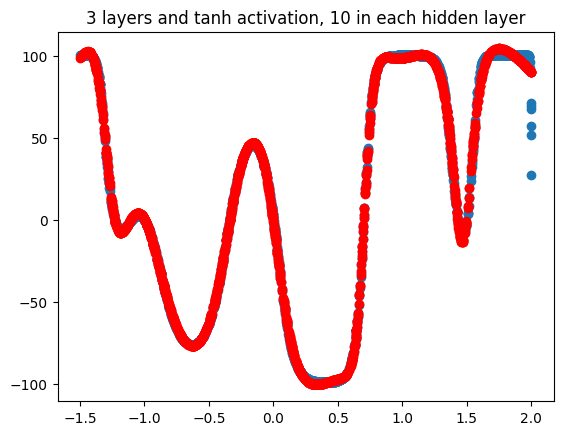

MSE for 3 layers and tanh activation: 7.922780198992561


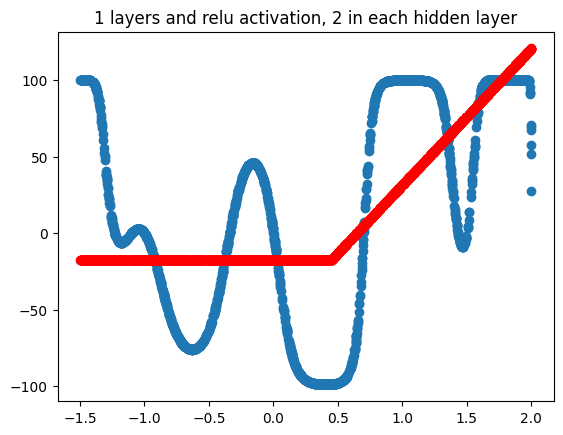

MSE for 1 layers and relu activation: 3150.061078296843


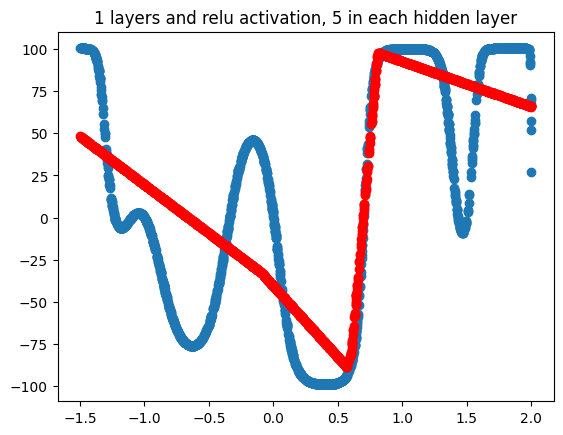

MSE for 1 layers and relu activation: 1614.5281651963364


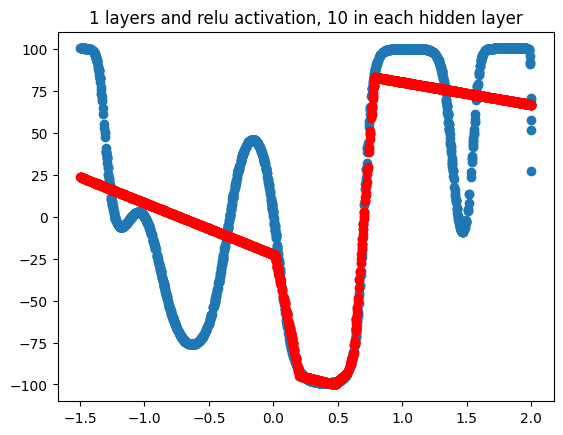

MSE for 1 layers and relu activation: 1413.4555999871986


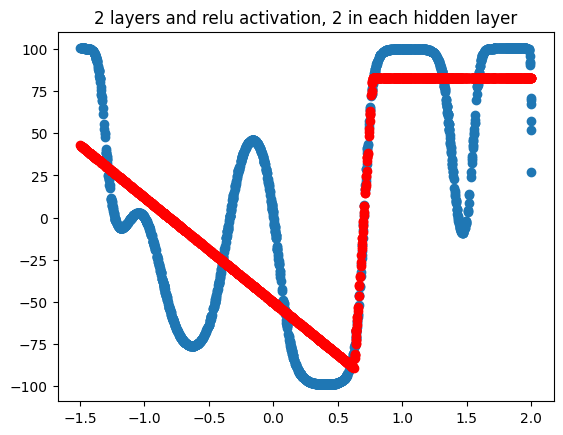

MSE for 2 layers and relu activation: 1594.8426319813807


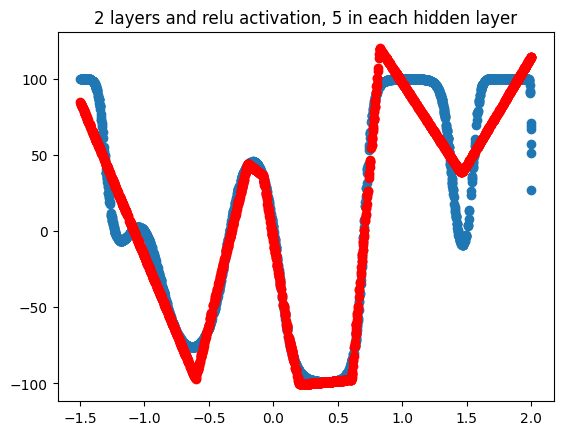

MSE for 2 layers and relu activation: 272.6425783815277


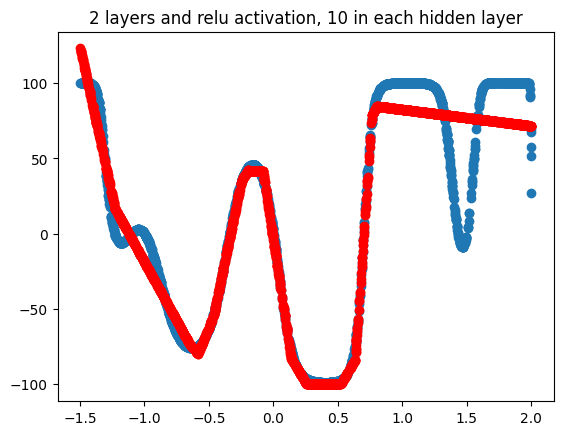

MSE for 2 layers and relu activation: 358.7856206581592


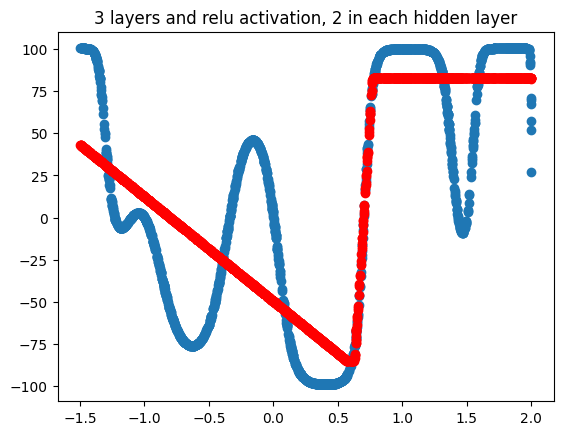

MSE for 3 layers and relu activation: 1595.8737663162947


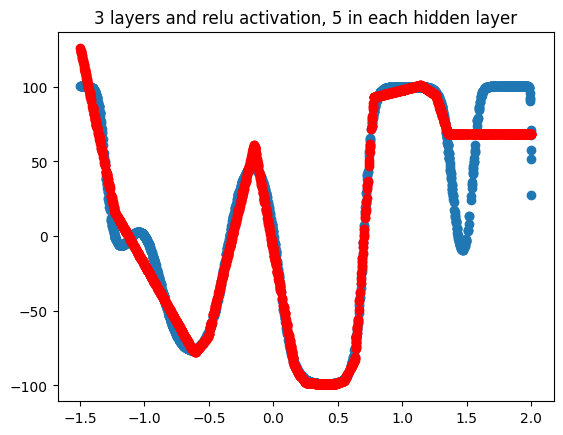

MSE for 3 layers and relu activation: 309.4880386396762


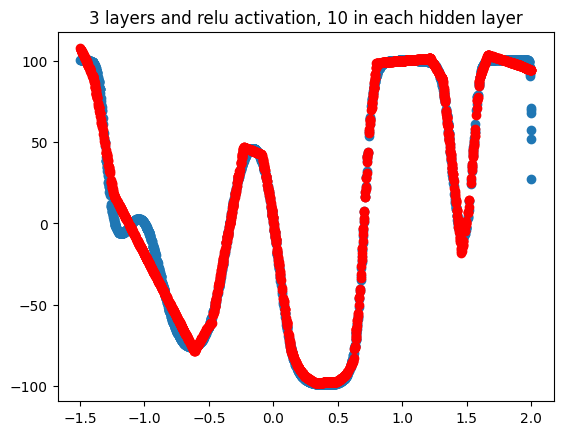

MSE for 3 layers and relu activation: 41.757164390020044


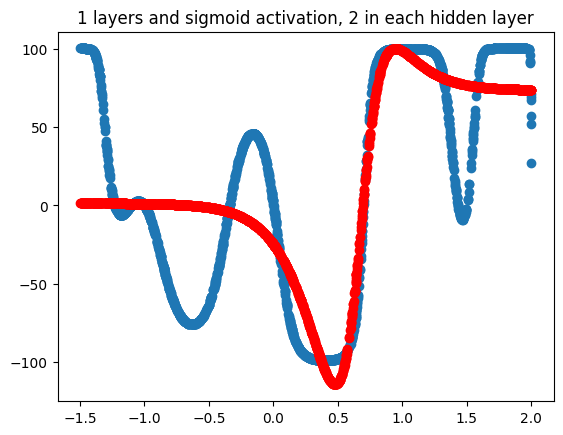

MSE for 1 layers and sigmoid activation: 1584.0832420459235


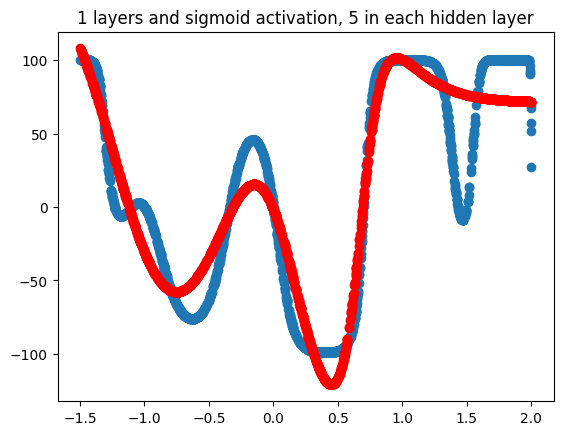

MSE for 1 layers and sigmoid activation: 575.6028937489211


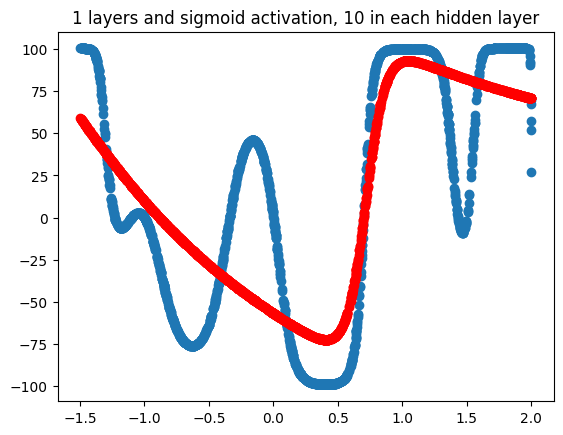

MSE for 1 layers and sigmoid activation: 1692.488203802777


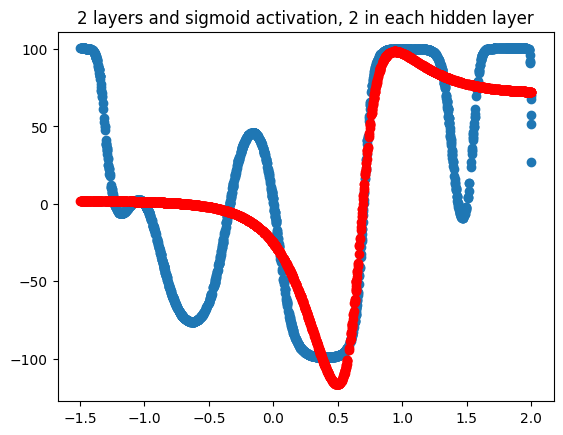

MSE for 2 layers and sigmoid activation: 1588.2580265017734


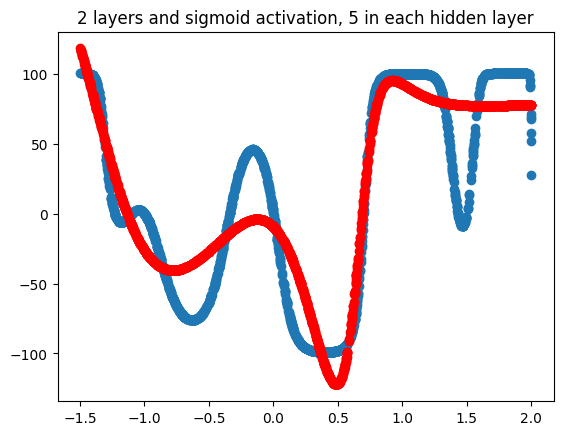

MSE for 2 layers and sigmoid activation: 764.8003206942724


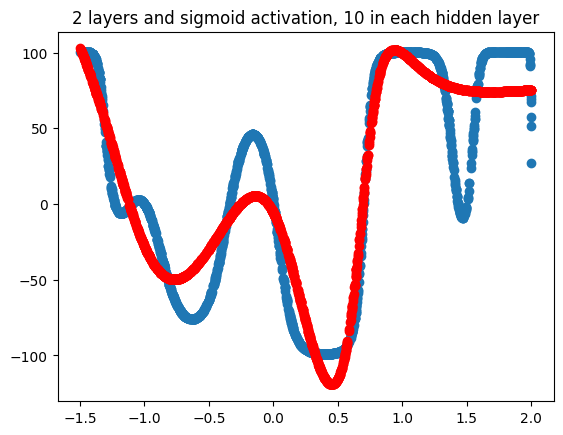

MSE for 2 layers and sigmoid activation: 629.0386952453655


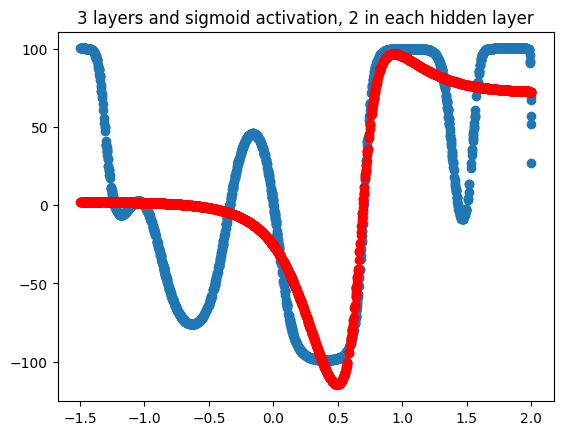

MSE for 3 layers and sigmoid activation: 1580.6856100066416


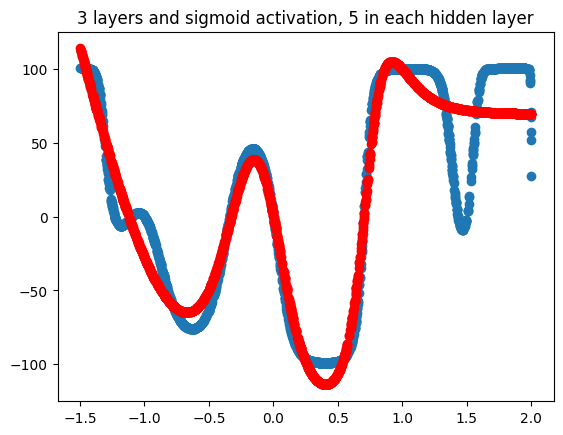

MSE for 3 layers and sigmoid activation: 413.35874256615796


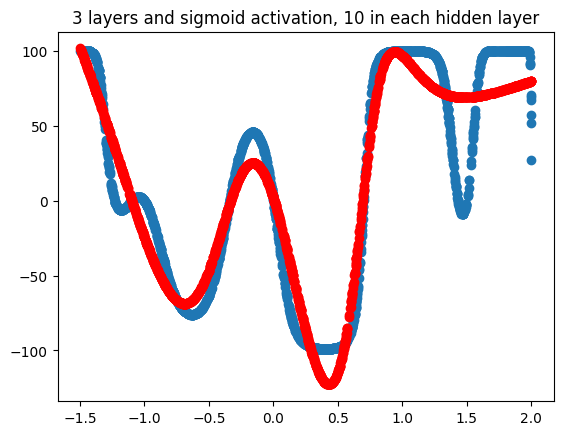

MSE for 3 layers and sigmoid activation: 467.3829341811065


In [16]:
mlps = {}
for activation in activations:
    for num_layer in num_layers:
        for neurons in num_neurons:
            
            mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False, regularization=None)
            losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=0.01, plot_losses=False, verbose=False)

            y_hat = mlp.predict(val[["x"]].to_numpy().T)
            plt.scatter(multimodal_val["x"], multimodal_val["y"])
            plt.scatter(multimodal_val["x"], norm.denorm(y_hat.T, index="y"), color="red")
            plt.title(f"{num_layer} layers and {activation} activation, {neurons} in each hidden layer")
            plt.show()
            print(f"MSE for {num_layer} layers and {activation} activation:", np.mean((multimodal_val[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))
            mses.append(np.mean((multimodal_val[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))
            mlps[str(activation) + str(num_layer) + "_" + str(neurons)] = mlp

In [19]:
mlps.keys()

dict_keys(['linear1_2', 'linear1_5', 'linear1_10', 'linear2_2', 'linear2_5', 'linear2_10', 'linear3_2', 'linear3_5', 'linear3_10', 'tanh1_2', 'tanh1_5', 'tanh1_10', 'tanh2_2', 'tanh2_5', 'tanh2_10', 'tanh3_2', 'tanh3_5', 'tanh3_10', 'relu1_2', 'relu1_5', 'relu1_10', 'relu2_2', 'relu2_5', 'relu2_10', 'relu3_2', 'relu3_5', 'relu3_10', 'sigmoid1_2', 'sigmoid1_5', 'sigmoid1_10', 'sigmoid2_2', 'sigmoid2_5', 'sigmoid2_10', 'sigmoid3_2', 'sigmoid3_5', 'sigmoid3_10'])

In [20]:
print("MSE on test set of tanh_3_10 ", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(mlps["tanh3_10"].predict(test[["x"]].to_numpy().T), index="y"))**2))

MSE on test set of tanh_3_10  5.244551650909459


In [22]:
print("MSE on test set of relu3_10 ", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(mlps["relu3_10"].predict(test[["x"]].to_numpy().T), index="y"))**2))

MSE on test set of relu3_10  34.383190247106185


## wybór architektury
najlepsze okazały się archtektury z tanh oraz największą liczbą warstw i neuronów. Przetestujemy sieci z 3 warstwami, 10 neuronami na warstwe oraz z funkcją aktywacji tanh oraz relu

In [35]:
import time
learning_rates = [0.5, 0.1, 0.05, 0.001]
max_epochs = 1000

## regresja

In [36]:

norm = networks.assets.Normalizator(multimodal_train)
train = norm(multimodal_train)
test = norm(multimodal_test)

Training time: 49.75238633155823 seconds


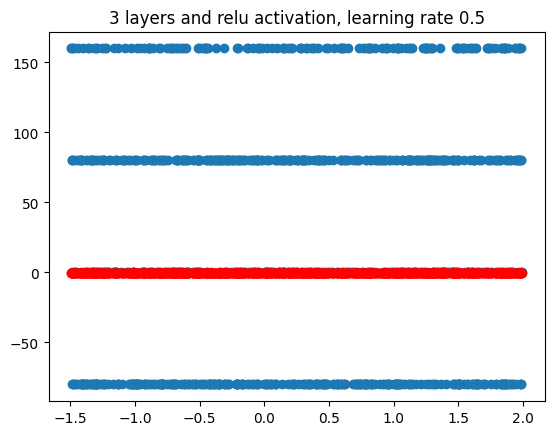

training MSE  5376.126919933169
MSE for 3 layers and relu activation, 
learning rate 0.5: 5424.4290091201665
Training time: 56.01436495780945 seconds


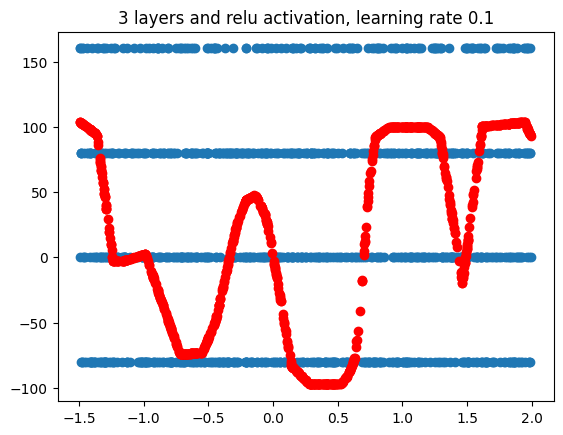

training MSE  10.673285648862464
MSE for 3 layers and relu activation, 
learning rate 0.1: 7.535179350833505
Training time: 74.60833787918091 seconds


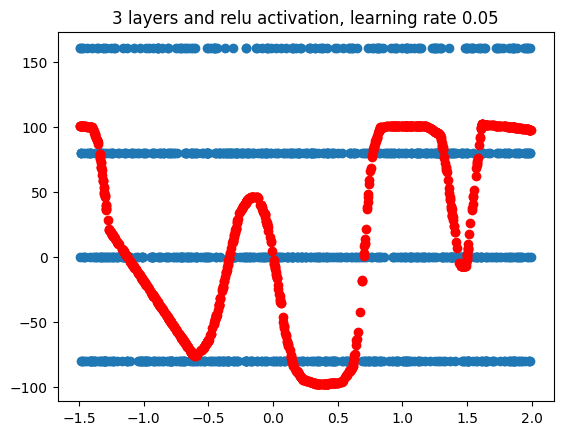

training MSE  32.226188564168446
MSE for 3 layers and relu activation, 
learning rate 0.05: 26.552784543967224
Training time: 55.08146786689758 seconds


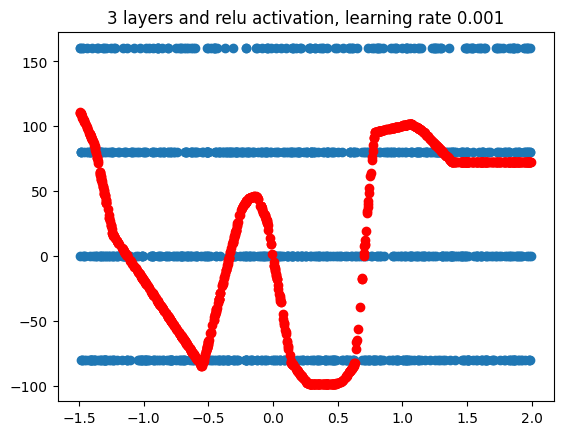

training MSE  335.9447542355369
MSE for 3 layers and relu activation, 
learning rate 0.001: 359.3591849633377


In [37]:
activation = "relu"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False, regularization=None)
    start_time = time.time()

    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    end_time = time.time()
    training_time = end_time - start_time

    print("Training time:", training_time, "seconds")

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(multimodal_test["x"], steps_test["y"])
    plt.scatter(multimodal_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print("training MSE ", np.mean((multimodal_train[["y"]].to_numpy().T - norm.denorm(mlp.predict(train[["x"]].to_numpy().T), index="y"))**2))
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

d:\studia\sem6\miowad\miowad\NN\networks\layers.py:166: RuntimeWarning: overflow encountered in matmul
  g = np.matmul(self.weights.T, self.dZ) # * self.activation_prime(self.get_linear_output())
d:\studia\sem6\miowad\miowad\NN\networks\layers.py:152: RuntimeWarning: invalid value encountered in multiply
  self.dZ = upstream_gradient * self.activation_prime(self.get_linear_output())


Training time: 99.46041178703308 seconds


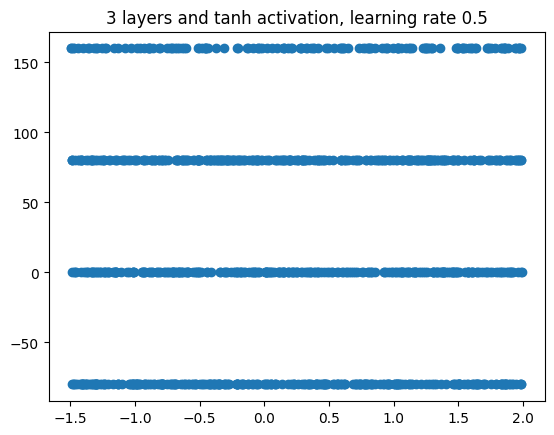

training MSE  nan
MSE for 3 layers and tanh activation, 
learning rate 0.5: nan
Training time: 88.58181381225586 seconds


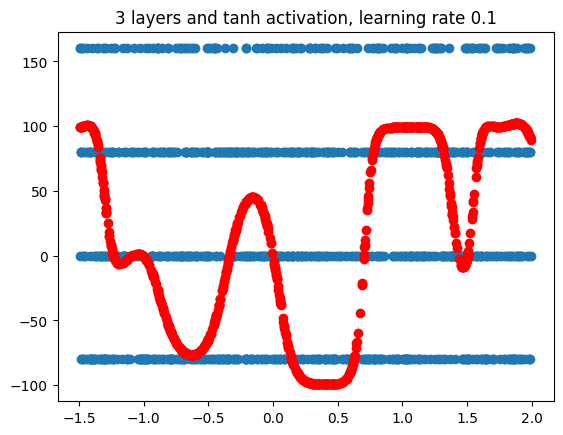

training MSE  5.401984743581114
MSE for 3 layers and tanh activation, 
learning rate 0.1: 2.065397163110319
Training time: 87.84511399269104 seconds


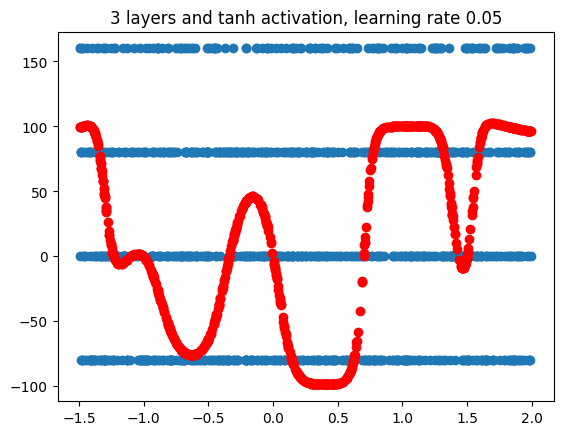

training MSE  6.133591137767229
MSE for 3 layers and tanh activation, 
learning rate 0.05: 1.6544859454344452
Training time: 83.18280148506165 seconds


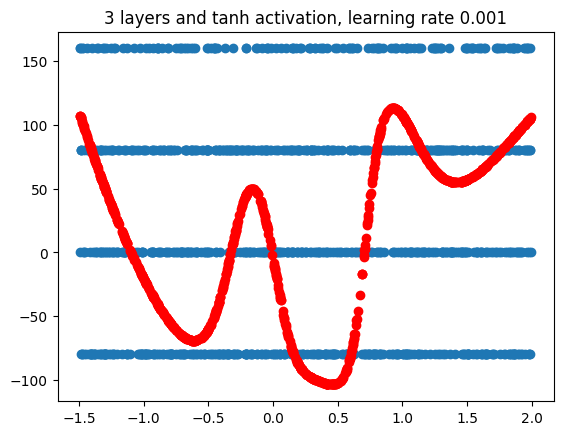

training MSE  311.45895659574796
MSE for 3 layers and tanh activation, 
learning rate 0.001: 315.7034107601738


In [38]:
activation = "tanh"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False, regularization=None)
    start_time = time.time()

    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    end_time = time.time()
    training_time = end_time - start_time

    print("Training time:", training_time, "seconds")

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(multimodal_test["x"], steps_test["y"])
    plt.scatter(multimodal_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print("training MSE ", np.mean((multimodal_train[["y"]].to_numpy().T - norm.denorm(mlp.predict(train[["x"]].to_numpy().T), index="y"))**2))
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

In [27]:

norm = networks.assets.Normalizator(steps_train)
train = norm(steps_train)
test = norm(steps_test)

In [28]:
num_layer = 3
neurons = 10
activation = "relu"

In [29]:
max_epochs = 1000

In [30]:
learning_rates = [0.5, 0.1, 0.05, 0.001]

In [31]:
import time

Training time: 44.521074533462524 seconds


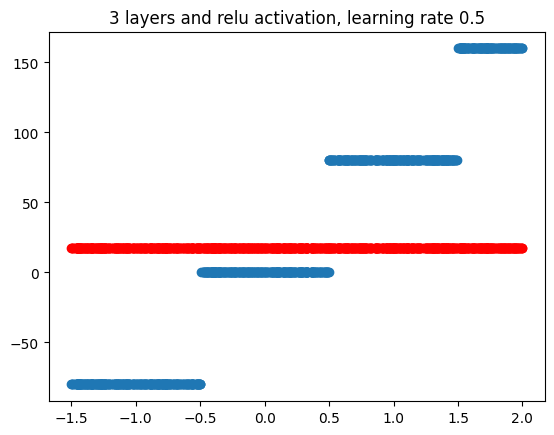

training MSE  6831.2
MSE for 3 layers and relu activation, 
learning rate 0.5: 6925.05
Training time: 47.15627336502075 seconds


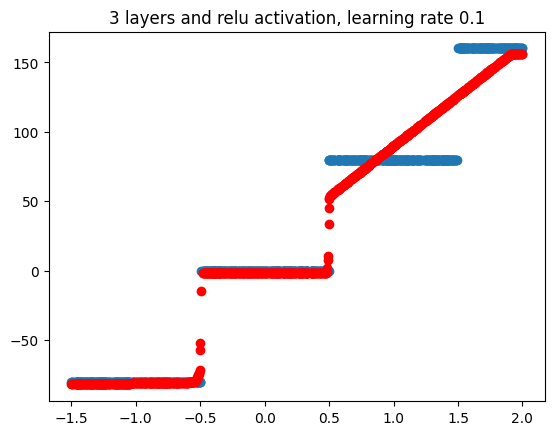

training MSE  212.9809888831667
MSE for 3 layers and relu activation, 
learning rate 0.1: 222.70797420386782
Training time: 42.4603967666626 seconds


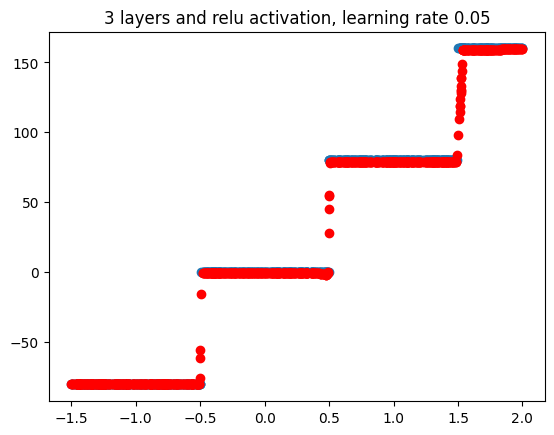

training MSE  22.377673987472093
MSE for 3 layers and relu activation, 
learning rate 0.05: 23.177605611967802
Training time: 42.175620317459106 seconds


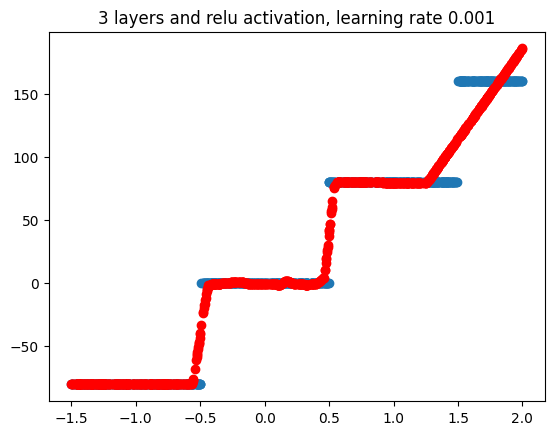

training MSE  130.22717790521352
MSE for 3 layers and relu activation, 
learning rate 0.001: 142.32838621099668


In [33]:
activation = "relu"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False, regularization=None)
    start_time = time.time()

    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    end_time = time.time()
    training_time = end_time - start_time

    print("Training time:", training_time, "seconds")

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(steps_test["x"], steps_test["y"])
    plt.scatter(steps_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print("training MSE ", np.mean((steps_train[["y"]].to_numpy().T - norm.denorm(mlp.predict(train[["x"]].to_numpy().T), index="y"))**2))
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((steps_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

d:\studia\sem6\miowad\miowad\NN\networks\layers.py:166: RuntimeWarning: overflow encountered in matmul
  g = np.matmul(self.weights.T, self.dZ) # * self.activation_prime(self.get_linear_output())
d:\studia\sem6\miowad\miowad\NN\networks\layers.py:152: RuntimeWarning: invalid value encountered in multiply
  self.dZ = upstream_gradient * self.activation_prime(self.get_linear_output())


Training time: 91.98226380348206 seconds


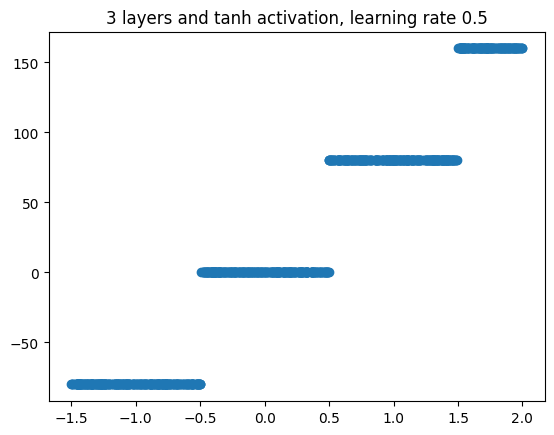

training MSE  nan
MSE for 3 layers and tanh activation, 
learning rate 0.5: nan
Training time: 97.34271359443665 seconds


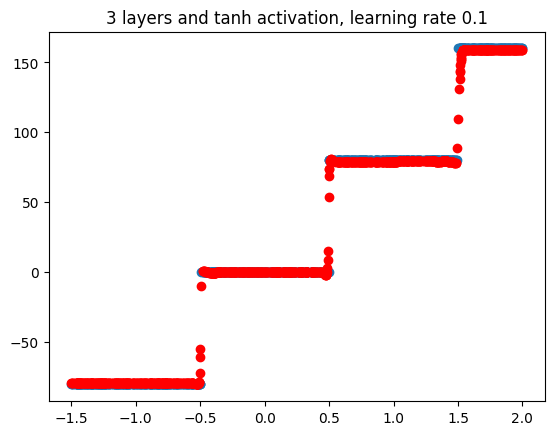

training MSE  15.846575433538048
MSE for 3 layers and tanh activation, 
learning rate 0.1: 9.976074369636216
Training time: 87.0567581653595 seconds


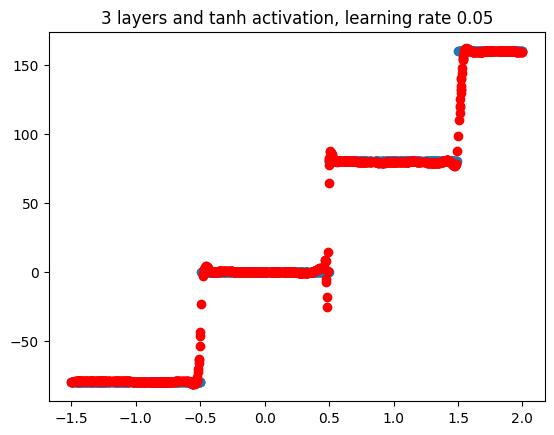

training MSE  30.579096316702472
MSE for 3 layers and tanh activation, 
learning rate 0.05: 28.30510213018193
Training time: 92.48942017555237 seconds


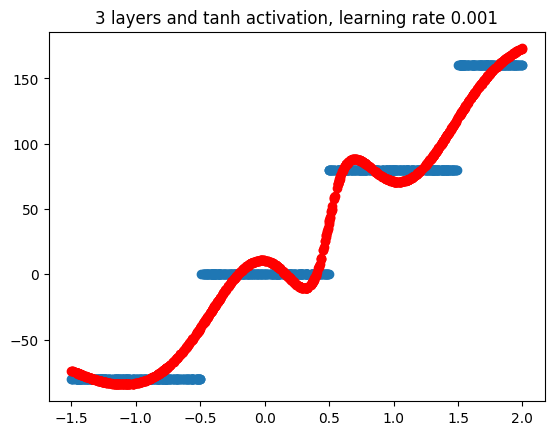

training MSE  211.97141280456708
MSE for 3 layers and tanh activation, 
learning rate 0.001: 223.8370769002282


In [34]:
activation = "tanh"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False, regularization=None)
    start_time = time.time()

    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    end_time = time.time()
    training_time = end_time - start_time

    print("Training time:", training_time, "seconds")

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(steps_test["x"], steps_test["y"])
    plt.scatter(steps_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print("training MSE ", np.mean((steps_train[["y"]].to_numpy().T - norm.denorm(mlp.predict(train[["x"]].to_numpy().T), index="y"))**2))
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((steps_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

# classification problems

## rings3

In [39]:
norm = networks.assets.Normalizator(rings3_train[['x', 'y']])
train = norm(rings3_train[["x", "y"]])
y_train = rings3_train[["c"]].to_numpy().T
test = norm(rings3_test[["x", "y"]])
y_test = rings3_test[["c"]].to_numpy().T

In [17]:
rings3_train[["x", "y"]]

x          y
0    -93.563317 -76.345110
1      1.060114 -16.727040
2     24.396099  40.358822
3    -94.595137 -97.889250
4    -85.331382 -56.736933
...         ...        ...
1495  -3.227585 -69.846357
1496 -82.598085 -51.758017
1497 -46.601078 -21.654871
1498 -59.106450 -44.528442
1499 -45.502025 -30.420834

[1500 rows x 2 columns]

Text(0.5, 1.0, 'True classes')

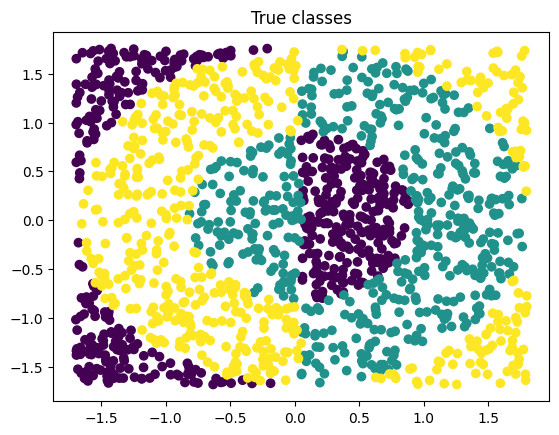

In [18]:
plt.scatter(train["x"], train["y"], c=y_train)
plt.title("True classes")

In [19]:
layers(activation, num_layer, neurons, output_type="classification", output_dim=3)

[{'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 3,
  'output_type': 'classification',
  'activation': 'softmax',
  'init': 'normal'}]

In [20]:
y_train.shape

(1, 1500)

In [21]:
y_hat

array([[ 1.62482852, -1.04881168, -1.18718783,  0.75931741, -1.16520216,
         0.58397856, -0.64264438, -1.16409459, -1.28536529, -1.3301742 ,
        -1.1751272 , -1.18479312,  0.30047558,  1.25007729, -0.13554275,
        -0.27728635, -1.34852373,  0.64859781,  1.71101562, -1.20831348,
         1.66750333,  0.02632451, -0.96096764,  1.7153703 ,  1.5927214 ,
        -1.33473649, -1.30891806,  0.6799766 , -0.05046023,  0.93311236,
         1.70777383, -1.20265803,  0.85189827,  0.66457695, -0.27861918,
         0.70726449, -1.15777242, -0.22011496,  0.58704368,  1.65442584,
        -1.31524602,  0.39884069,  1.71161428, -0.20324393,  1.57285357,
        -0.29525448,  0.78311784, -1.32902987,  1.64245864,  0.61248699,
        -1.22442355, -0.41540394,  1.71032314, -0.32673752,  1.70515176,
         0.70919003,  1.47689517, -0.36616881,  0.73263061, -1.22825788,
        -1.29960061,  0.62959532, -0.49603629, -0.63285843, -0.3048547 ,
        -1.29675101,  1.61031376, -0.26245611, -1.1

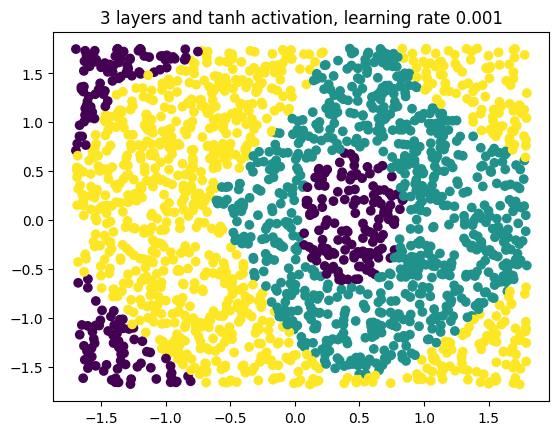

Fscore for 3 layers and tanh activation, 
learning rate 0.001: 0.7771986248934009
Accuracy for 3 layers and tanh activation, 
learning rate 0.001: 1743.0


In [22]:
mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=3), input=train.T, verbose=False, output_type="classification")
losses = mlp.train(train.to_numpy().T, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

y_pred = mlp.full_forward_pass(test.T)
y_hat = mlp.predict(test.T)
y_test_onehot = networks.assets.one_hot(y_test, 3)

plt.scatter(test["x"], test["y"], c=y_hat)
plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
plt.show()
print(f"Fscore for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test) / len(y_test))

Training time: 9.176433324813843 seconds


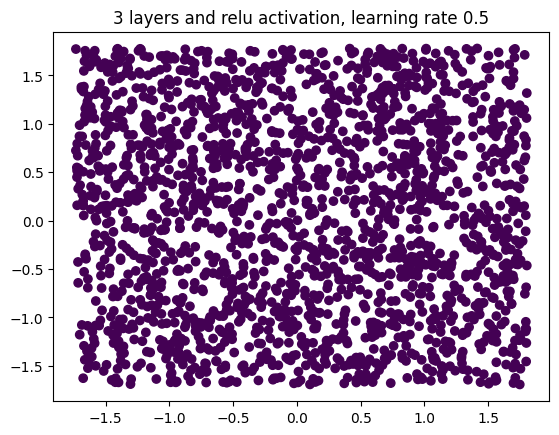

Fscore for train 3 layers and relu activation, 
learning rate 0.5: 0.3270161991524055
Fscore for test 3 layers and relu activation, 
learning rate 0.5: 0.3959321015906416
Accuracy for 3 layers and relu activation, 
learning rate 0.5: 815.0
Training time: 10.972774744033813 seconds


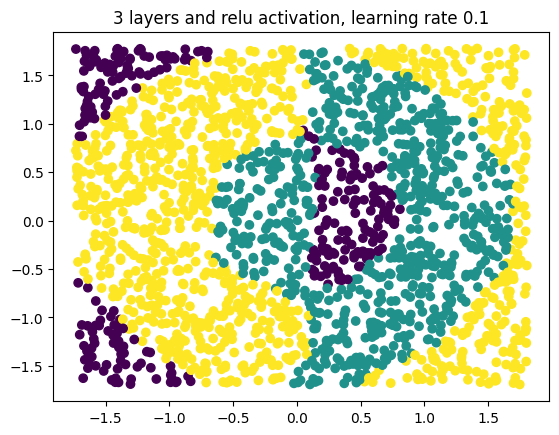

Fscore for train 3 layers and relu activation, 
learning rate 0.1: 0.8548788572769759
Fscore for test 3 layers and relu activation, 
learning rate 0.1: 0.8638361852016472
Accuracy for 3 layers and relu activation, 
learning rate 0.1: 1733.0
Training time: 8.600486516952515 seconds


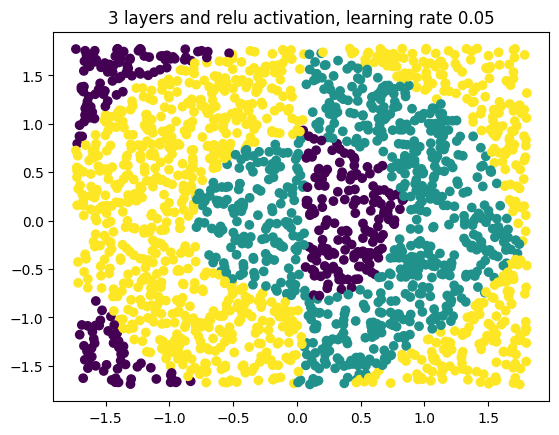

Fscore for train 3 layers and relu activation, 
learning rate 0.05: 0.8835723352147052
Fscore for test 3 layers and relu activation, 
learning rate 0.05: 0.8816356810001609
Accuracy for 3 layers and relu activation, 
learning rate 0.05: 1769.0
Training time: 7.563386678695679 seconds


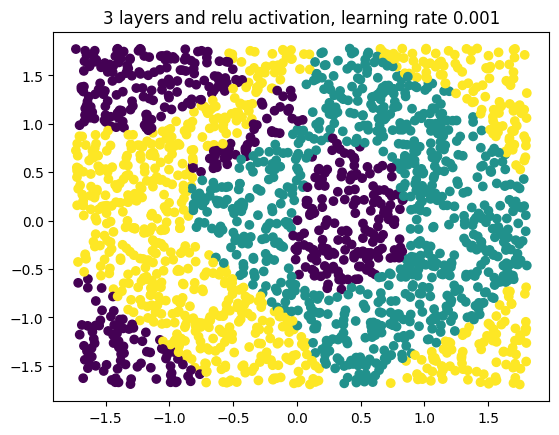

Fscore for train 3 layers and relu activation, 
learning rate 0.001: 0.7418646055129485
Fscore for test 3 layers and relu activation, 
learning rate 0.001: 0.7400991535028136
Accuracy for 3 layers and relu activation, 
learning rate 0.001: 1748.0
Training time: 13.783992528915405 seconds


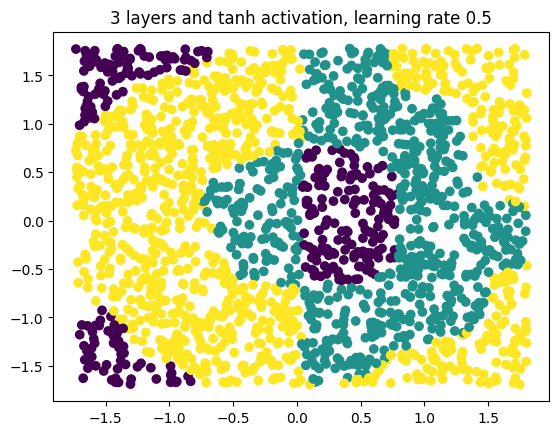

Fscore for train 3 layers and tanh activation, 
learning rate 0.5: 0.8495212494729008
Fscore for test 3 layers and tanh activation, 
learning rate 0.5: 0.8510932571548038
Accuracy for 3 layers and tanh activation, 
learning rate 0.5: 1748.0
Training time: 13.22270393371582 seconds


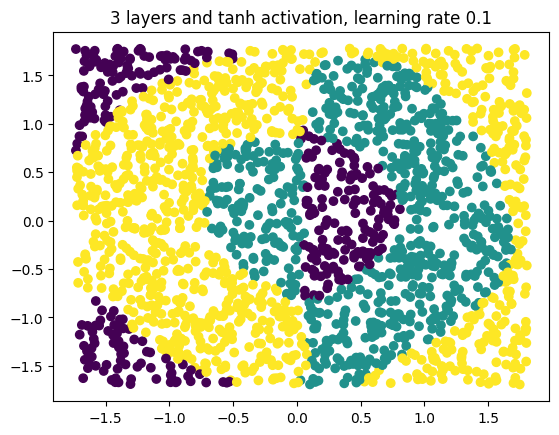

Fscore for train 3 layers and tanh activation, 
learning rate 0.1: 0.9033466038435082
Fscore for test 3 layers and tanh activation, 
learning rate 0.1: 0.8960307261376059
Accuracy for 3 layers and tanh activation, 
learning rate 0.1: 1790.0
Training time: 13.721210241317749 seconds


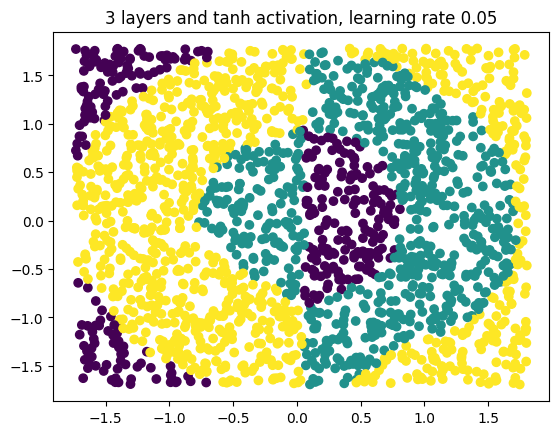

Fscore for train 3 layers and tanh activation, 
learning rate 0.05: 0.9040083803914168
Fscore for test 3 layers and tanh activation, 
learning rate 0.05: 0.9034587379800143
Accuracy for 3 layers and tanh activation, 
learning rate 0.05: 1810.0
Training time: 15.356658697128296 seconds


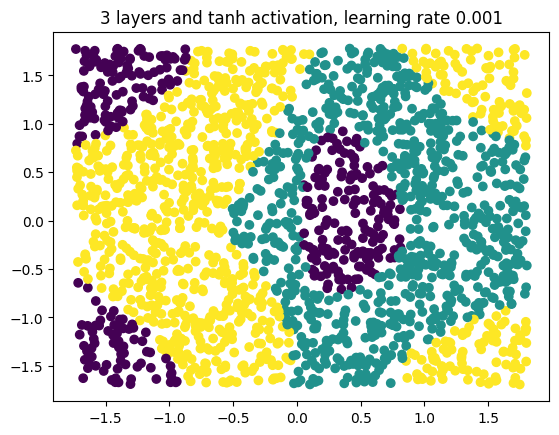

Fscore for train 3 layers and tanh activation, 
learning rate 0.001: 0.7452000935536938
Fscore for test 3 layers and tanh activation, 
learning rate 0.001: 0.7450557858145139
Accuracy for 3 layers and tanh activation, 
learning rate 0.001: 1746.0


In [40]:
activation = "relu"
for activation in ["relu", "tanh"]:
    for learning_rate in learning_rates:
        mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=3), input=train.T, verbose=False, output_type="classification", regularization=None)

        start_time = time.time()
        losses = mlp.train(train.to_numpy().T, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)
        end_time = time.time()
        training_time = end_time - start_time
        print("Training time:", training_time, "seconds")

        y_pred = mlp.full_forward_pass(test.T)
        y_hat = mlp.predict(test.T)
        y_test_onehot = networks.assets.one_hot(y_test, 3)

        y_hat_train = mlp.full_forward_pass(train.T)
        y_train_onehot = networks.assets.one_hot(y_train, 3)

        plt.scatter(test["x"], test["y"], c=y_hat)
        plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
        plt.show()
        print(f"Fscore for train {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_hat_train, y_train_onehot))
        print(f"Fscore for test {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
        print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test) / len(y_test))

## rings5

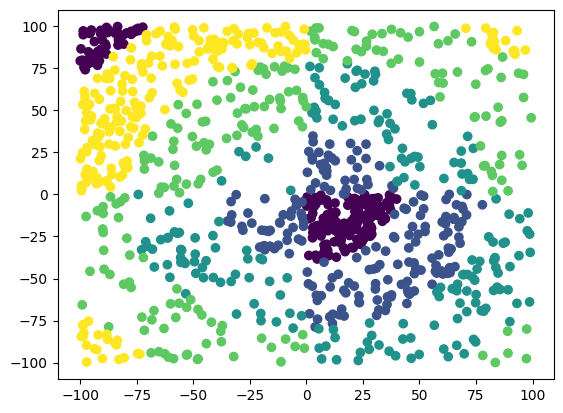

In [41]:
plt.scatter(rings5_train["x"], rings5_train["y"], c=rings5_train.c)

In [44]:
norm = networks.assets.Normalizator(rings5_train[['x', 'y']])
train = norm(rings5_train[["x", "y"]]).to_numpy().T
y_train = rings5_train[["c"]].to_numpy().T
test = norm(rings5_test[["x", "y"]])
y_test = rings5_test[["c"]].to_numpy().T

Training time: 7.571039915084839 seconds


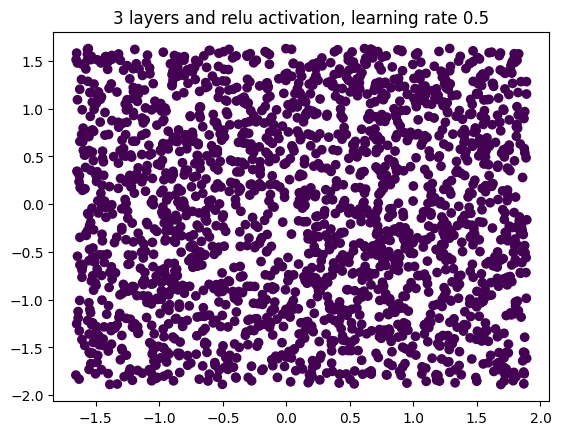

Fscore for train 3 layers and relu activation, 
learning rate 0.5: 0.20500166506731451
Fscore for test 3 layers and relu activation, 
learning rate 0.5: 0.17262711125374083
Accuracy for 3 layers and relu activation, 
learning rate 0.5: 0.1255
Training time: 7.606961488723755 seconds


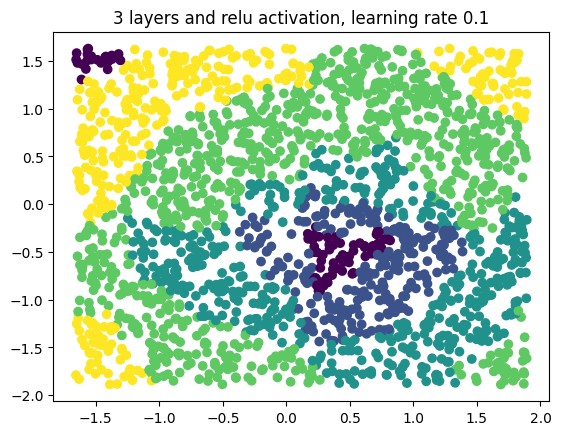

Fscore for train 3 layers and relu activation, 
learning rate 0.1: 0.7514829228338269
Fscore for test 3 layers and relu activation, 
learning rate 0.1: 0.7689224372193016
Accuracy for 3 layers and relu activation, 
learning rate 0.1: 0.782
Training time: 8.45675015449524 seconds


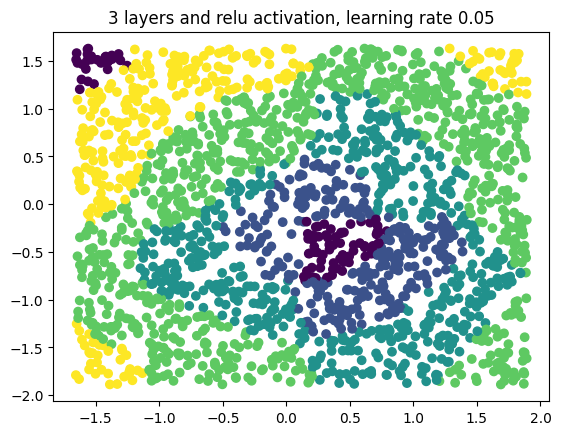

Fscore for train 3 layers and relu activation, 
learning rate 0.05: 0.8595444874768398
Fscore for test 3 layers and relu activation, 
learning rate 0.05: 0.8343739684310322
Accuracy for 3 layers and relu activation, 
learning rate 0.05: 0.845
Training time: 7.863264322280884 seconds


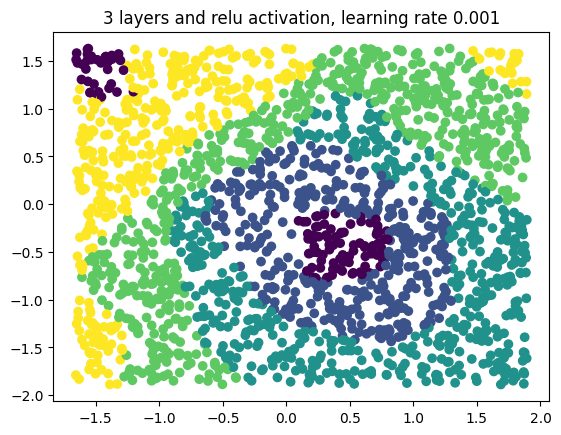

Fscore for train 3 layers and relu activation, 
learning rate 0.001: 0.6330498789945351
Fscore for test 3 layers and relu activation, 
learning rate 0.001: 0.566497856437606
Accuracy for 3 layers and relu activation, 
learning rate 0.001: 0.7345
Training time: 12.503638744354248 seconds


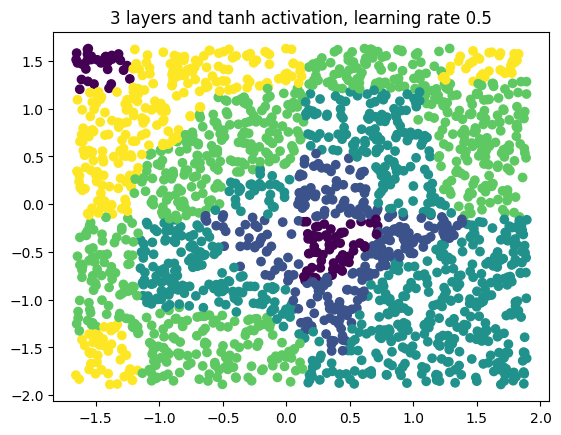

Fscore for train 3 layers and tanh activation, 
learning rate 0.5: 0.8300334961754721
Fscore for test 3 layers and tanh activation, 
learning rate 0.5: 0.7766599073727251
Accuracy for 3 layers and tanh activation, 
learning rate 0.5: 0.8145
Training time: 11.988961458206177 seconds


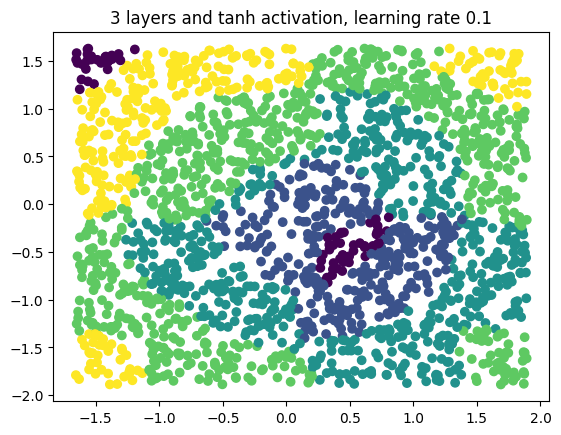

Fscore for train 3 layers and tanh activation, 
learning rate 0.1: 0.8608125252050708
Fscore for test 3 layers and tanh activation, 
learning rate 0.1: 0.8598952024185046
Accuracy for 3 layers and tanh activation, 
learning rate 0.1: 0.868
Training time: 11.034067392349243 seconds


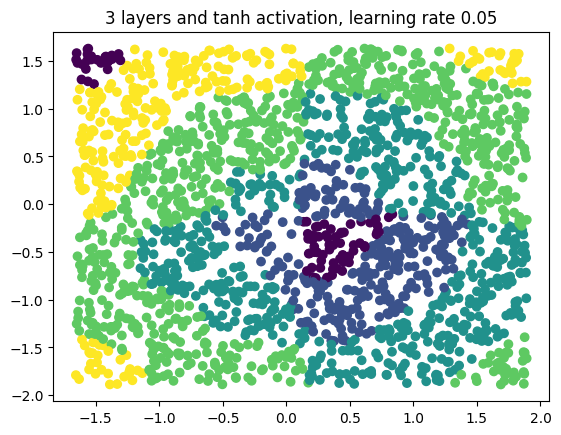

Fscore for train 3 layers and tanh activation, 
learning rate 0.05: 0.9142974146787434
Fscore for test 3 layers and tanh activation, 
learning rate 0.05: 0.8937175913938012
Accuracy for 3 layers and tanh activation, 
learning rate 0.05: 0.903
Training time: 12.675182580947876 seconds


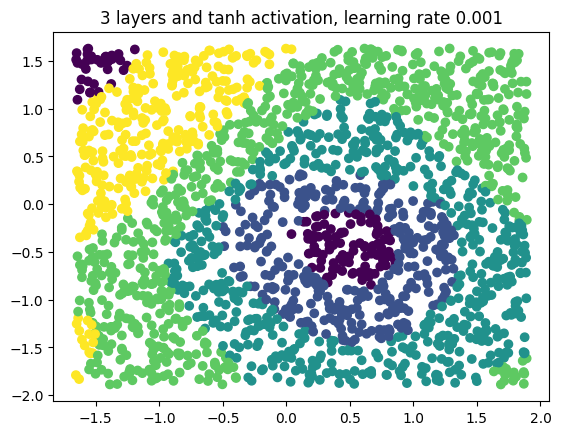

Fscore for train 3 layers and tanh activation, 
learning rate 0.001: 0.638437782585713
Fscore for test 3 layers and tanh activation, 
learning rate 0.001: 0.5857803698293181
Accuracy for 3 layers and tanh activation, 
learning rate 0.001: 0.7705


In [46]:
activation = "relu"
for activation in ["relu", "tanh"]:
    for learning_rate in learning_rates:
        mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=5), input=train, verbose=False, output_type="classification", regularization=None)

        start_time = time.time()
        losses = mlp.train(train, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)
        end_time = time.time()
        training_time = end_time - start_time
        print("Training time:", training_time, "seconds")

        y_pred = mlp.full_forward_pass(test.to_numpy().T)
        y_pred_train = mlp.full_forward_pass(train)
        y_hat = mlp.predict(test.to_numpy().T)
        y_test_onehot = networks.assets.one_hot(y_test, 5)
        y_train_onehot = networks.assets.one_hot(y_train, 5)

        plt.scatter(test["x"], test["y"], c=y_hat)
        plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
        plt.show()
        print(f"Fscore for train {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred_train, y_train_onehot))
        print(f"Fscore for test {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
        print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test.flatten()) / len(y_hat))